# Market Basket Analysis

## Data preprocessing

In [27]:
import os
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [40]:
input_path = os.getcwd()
products = pd.read_csv(input_path+'\\Data\\olist_products_dataset.csv')
product_trans = pd.read_csv(input_path+'\\Data\\product_category_name_translation.csv')
order_items = pd.read_csv(input_path+'\\Data\\olist_order_items_dataset.csv')

In [41]:
products = pd.merge(products, product_trans, on = 'product_category_name', how = 'left').drop(columns='product_category_name')
column_to_move = 'product_category_name_english'
col = products.pop(column_to_move)
products.insert(1, column_to_move, col)
products['product_category_name_english']= products['product_category_name_english'].fillna("other")
products

,product_id,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


## Product Category Level Analysis

In [30]:
order_product = pd.merge(order_items, products, on = 'product_id', how = 'left')
order_product_category = order_product[['order_id','product_category_name_english']].drop_duplicates()
order_product_category = order_product_category.groupby(['order_id'])['product_category_name_english'].agg(list).reset_index()
order_product_category

,order_id,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,[cool_stuff]
1,00018f77f2f0320c557190d7a144bdd3,[pet_shop]
2,000229ec398224ef6ca0657da4fc703e,[furniture_decor]
3,00024acbcdf0a6daa1e931b038114c75,[perfumery]
4,00042b26cf59d7ce69dfabb4e55b4fd9,[garden_tools]
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,[housewares]
98662,fffcd46ef2263f404302a634eb57f7eb,[computers_accessories]
98663,fffce4705a9662cd70adb13d4a31832d,[sports_leisure]
98664,fffe18544ffabc95dfada21779c9644f,[computers_accessories]


In [14]:
order_list = [product for product in order_product_category['product_category_name_english']]
encoder = TransactionEncoder().fit(order_list)
onehot = encoder.transform(order_list)
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot

,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98661,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98662,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98663,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
98664,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
print('Maximum length of itemsets:', order_product_category['product_category_name_english'].apply(len).max())
frequent_itemsets = apriori(onehot, min_support = 0.00001, max_len = 3, use_colnames = True)
frequent_itemsets

Maximum length of itemsets: 3


,support,itemsets
0,0.001845,(agro_industry_and_commerce)
1,0.002564,(air_conditioning)
2,0.002047,(art)
3,0.000233,(arts_and_craftmanship)
4,0.003547,(audio)
...,...,...
346,0.000010,"(other, pet_shop, costruction_tools_garden)"
347,0.000010,"(home_construction, garden_tools, furniture_de..."
348,0.000010,"(home_construction, furniture_decor, housewares)"
349,0.000010,"(furniture_decor, housewares, watches_gifts)"


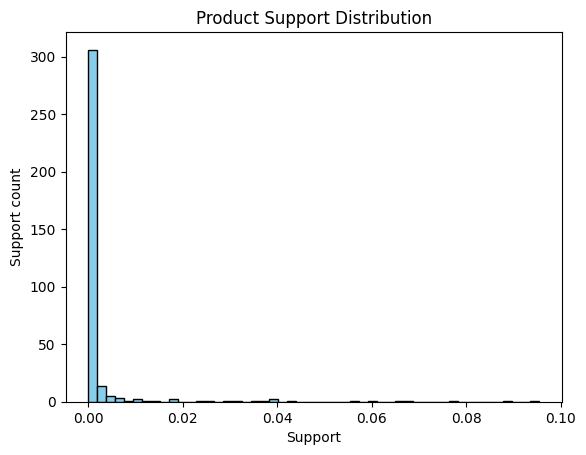

In [21]:
plt.hist(frequent_itemsets['support'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Support')
plt.ylabel('Support count')
plt.title('Product Category Support Distribution')
plt.show()

It's obvious that most itemsets support are pretty low, meaning that olist is selling a wide range of product categories to earn profit instead of selling a few popular product category.

In [25]:
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 1)
rules.sort_values(by=['support','zhangs_metric'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,"(perfumery, bed_bath_table)",(market_place),0.00001,0.002838,0.00001,1.0,352.378571,0.000010,inf,0.997172
1,"(fashion_bags_accessories, auto)",(musical_instruments),0.00001,0.006365,0.00001,1.0,157.111465,0.000010,inf,0.993645
8,"(bed_bath_table, sports_leisure)",(other),0.00001,0.014929,0.00001,1.0,66.983028,0.000010,inf,0.985081
14,"(costruction_tools_garden, pet_shop)",(other),0.00001,0.014929,0.00001,1.0,66.983028,0.000010,inf,0.985081
2,"(auto, musical_instruments)",(fashion_bags_accessories),0.00001,0.018892,0.00001,1.0,52.932403,0.000010,inf,0.981118
5,"(construction_tools_lights, bed_bath_table)",(garden_tools),0.00001,0.035656,0.00001,1.0,28.046049,0.000010,inf,0.964354
10,"(cine_photo, telephony)",(cool_stuff),0.00001,0.036811,0.00001,1.0,27.165749,0.000010,inf,0.963199
12,"(home_construction, computers_accessories)",(cool_stuff),0.00001,0.036811,0.00001,1.0,27.165749,0.000010,inf,0.963199
0,"(fashion_bags_accessories, musical_instruments)",(auto),0.00001,0.039497,0.00001,1.0,25.318450,0.000010,inf,0.960513
9,"(cool_stuff, cine_photo)",(telephony),0.00001,0.042558,0.00001,1.0,23.497499,0.000010,inf,0.957452


All the supports from our result are 0.00001. In most cases, we wouldn't select such low support values. However, we know that most product categories support falls around 0.00 from above distribution. Although these itemsets are not popular, they generate association rules that exhibit strong associations between some categories. The high confidence indicates that when a customer selects or purchases items from the antecedent product category, they will also choose items from the consequent product category. In such cases, we can recommend products from the consequent product categories to customers who have added items from the antecedent product categories to their shopping cart. This recommendation strategy leverages the strong associations to improve cross-selling and offer customers complementary or related products.    

## Product Level Analysis

In [31]:
order_product = order_product[['order_id','product_id']].drop_duplicates()
order_product = order_product.groupby(['order_id'])['product_id'].agg(list).reset_index()
order_product

,order_id,product_id
0,00010242fe8c5a6d1ba2dd792cb16214,[4244733e06e7ecb4970a6e2683c13e61]
1,00018f77f2f0320c557190d7a144bdd3,[e5f2d52b802189ee658865ca93d83a8f]
2,000229ec398224ef6ca0657da4fc703e,[c777355d18b72b67abbeef9df44fd0fd]
3,00024acbcdf0a6daa1e931b038114c75,[7634da152a4610f1595efa32f14722fc]
4,00042b26cf59d7ce69dfabb4e55b4fd9,[ac6c3623068f30de03045865e4e10089]
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,[4aa6014eceb682077f9dc4bffebc05b0]
98662,fffcd46ef2263f404302a634eb57f7eb,[32e07fd915822b0765e448c4dd74c828]
98663,fffce4705a9662cd70adb13d4a31832d,[72a30483855e2eafc67aee5dc2560482]
98664,fffe18544ffabc95dfada21779c9644f,[9c422a519119dcad7575db5af1ba540e]


In [32]:
order_list = [product for product in order_product['product_id']]
encoder = TransactionEncoder().fit(order_list)
onehot = encoder.transform(order_list)
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot

,00066f42aeeb9f3007548bb9d3f33c38,00088930e925c41fd95ebfe695fd2655,0009406fd7479715e4bef61dd91f2462,000b8f95fcb9e0096488278317764d19,000d9be29b5207b54e86aa1b1ac54872,0011c512eb256aa0dbbb544d8dffcf6e,00126f27c813603687e6ce486d909d01,001795ec6f1b187d37335e1c4704762e,001b237c0e9bb435f2e54071129237e9,001b72dfd63e9833e8c02742adf472e3,...,ffef256879dbadcab7e77950f4f4a195,fff0a542c3c62682f23305214eaeaa24,fff1059cd247279f3726b7696c66e44e,fff28f91211774864a1000f918ed00cc,fff515ea94dbf35d54d256b3e39f0fea,fff6177642830a9a94a0f2cba5e476d1,fff81cc3158d2725c0655ab9ba0f712c,fff9553ac224cec9d15d49f5a263411f,fffdb2d0ec8d6a61f0a0a0db3f25b441,fffe9eeff12fcbd74a2f2b007dde0c58
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98661,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98662,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98663,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98664,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
print('Maximum length of itemsets:', order_product['product_id'].apply(len).max())
frequent_itemsets = apriori(onehot, min_support = 0.0003, max_len = 8, use_colnames = True)
frequent_itemsets

Maximum length of itemsets: 8


,support,itemsets
0,0.000588,(0152f69b6cf919bcdaf117aa8c43e5a2)
1,0.000385,(027cdd14a677a5834bc67a9789db5021)
2,0.000456,(036734b5a58d5d4f46b0616ddc047ced)
3,0.000324,(044f05bc9de36e8a693a83e4bc79dd0d)
4,0.000456,(054515fd15bc1a2029f10de97ffa9120)
...,...,...
331,0.000547,(fc1d8637c0268af3db482c14b7ef8e75)
332,0.000456,(fe01b643060a6446e59f58e3021e66b3)
333,0.000314,(fe077ec80df6b4ee60bb4498d5ab1962)
334,0.000375,(fe6a9515d655fa7936b8a7c841039f34)


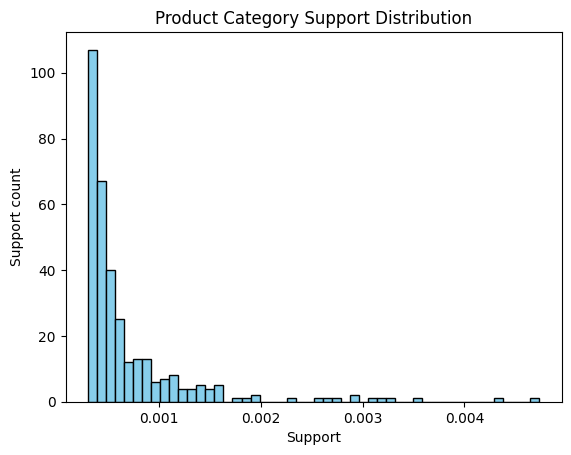

In [35]:
plt.hist(frequent_itemsets['support'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Support')
plt.ylabel('Support count')
plt.title('Product Support Distribution')
plt.show()

In [38]:
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.25)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(36f60d45225e60c7da4558b070ce4b60),(e53e557d5a159f5aa2c5e995dfdf244b),0.001125,0.001581,0.000345,0.306306,193.730885,0.000343,1.439279,0.995959


In [36]:
#Check product categories
products[(products['product_id']=='36f60d45225e60c7da4558b070ce4b60')|(products['product_id']=='e53e557d5a159f5aa2c5e995dfdf244b')]

,product_id,product_category_name_english,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
6869,36f60d45225e60c7da4558b070ce4b60,computers_accessories,informatica_acessorios,33.0,300.0,1.0,207.0,19.0,11.0,14.0
21395,e53e557d5a159f5aa2c5e995dfdf244b,computers_accessories,informatica_acessorios,33.0,256.0,1.0,180.0,17.0,10.0,13.0


As we can see from the distribution, most support falls below 0.001. Both our antecedent support and consequent support is larger than 0.001, meaning that they are more frequently bought than most products. Since they are both from computer accessories and the confidence is not high enough to gurantee the sale of consequent item, it's recommended to sell them as a bundle and offer a certain discount as this would potentially increase the sale of consequent item. 